<a href="https://colab.research.google.com/github/bmfaiml/bmfrepo/blob/main/Customer_purchase_prediction_supervised_learning_ASSIGNMENT_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_excel('Retail_Cleaned.xlsx')
df.head()

,TransactionID,CustomerID,Age,Quantity,Price,PurchaseDate,TotalAmount,PurchaseMonth,PurchaseDayOfWeek,AgeGroup,...,City_Pune,ProductCategory_Books,ProductCategory_Electronics,ProductCategory_Fashion,ProductCategory_Furniture,ProductCategory_Groceries,ProductCategory_Sports,PaymentMode_Cash,PaymentMode_UPI,PaymentMode_Wallet
0,T00001,C2824,-0.769570,0.030458,1.402371,2023-03-15,1.074680,3,Wednesday,26-40,...,False,False,False,True,False,False,False,True,False,False
1,T00002,C1409,-1.626186,1.447099,-1.022646,2023-01-22,-0.359843,1,Sunday,19-25,...,True,True,False,False,False,False,False,False,False,False
2,T00003,C5506,0.152939,-1.386183,-1.687615,2023-04-18,-1.261723,4,Tuesday,41-60,...,True,False,False,False,True,False,False,False,False,True
3,T00004,C5012,-1.560293,1.447099,0.317905,2023-08-09,1.301377,8,Wednesday,19-25,...,False,False,False,False,False,True,False,True,False,False
4,T00005,C4657,-0.242422,-1.386183,0.443117,2023-09-23,-0.733639,9,Saturday,41-60,...,False,False,False,False,False,False,True,False,False,True


In [3]:
from google.colab import files
import os

# Check if the file already exists
file_name = 'week1_cleaned_data.csv'
if not os.path.exists(file_name):
    uploaded = files.upload()
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))
else:
    print(f"File '{file_name}' already exists.")

Saving Retail_Cleaned.xlsx to Retail_Cleaned.xlsx
User uploaded file "Retail_Cleaned.xlsx" with length 340728 bytes


In [7]:
print(df.columns)

Index(['TransactionID', 'CustomerID', 'Age', 'Quantity', 'Price',
       'PurchaseDate', 'TotalAmount', 'PurchaseMonth', 'PurchaseDayOfWeek',
       'AgeGroup', 'Gender_Male', 'Gender_Other', 'City_Bengaluru',
       'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Jaipur',
       'City_Kolkata', 'City_Lucknow', 'City_Mumbai', 'City_Pune',
       'ProductCategory_Books', 'ProductCategory_Electronics',
       'ProductCategory_Fashion', 'ProductCategory_Furniture',
       'ProductCategory_Groceries', 'ProductCategory_Sports',
       'PaymentMode_Cash', 'PaymentMode_UPI', 'PaymentMode_Wallet'],
      dtype='object')


In [16]:
# Reload the original data
df = pd.read_excel('Retail_Cleaned.xlsx')

# Select the features, including PurchaseDate, Gender, City, and ProductCategory columns
selected_features = ['Age', 'Quantity', 'TotalAmount', 'PurchaseDate',
                       'Gender_Male', 'Gender_Other', 'City_Bengaluru',
                       'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Jaipur',
                       'City_Kolkata', 'City_Lucknow', 'City_Mumbai', 'City_Pune',
                       'ProductCategory_Books', 'ProductCategory_Electronics',
                       'ProductCategory_Fashion', 'ProductCategory_Furniture',
                       'ProductCategory_Groceries', 'ProductCategory_Sports']
df = df[selected_features]

display(df.head())

,Age,Quantity,TotalAmount,PurchaseDate,Gender_Male,Gender_Other,City_Bengaluru,City_Chennai,City_Delhi,City_Hyderabad,...,City_Kolkata,City_Lucknow,City_Mumbai,City_Pune,ProductCategory_Books,ProductCategory_Electronics,ProductCategory_Fashion,ProductCategory_Furniture,ProductCategory_Groceries,ProductCategory_Sports
0,-0.769570,0.030458,1.074680,2023-03-15,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,-1.626186,1.447099,-0.359843,2023-01-22,False,True,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2,0.152939,-1.386183,-1.261723,2023-04-18,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,-1.560293,1.447099,1.301377,2023-08-09,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,-0.242422,-1.386183,-0.733639,2023-09-23,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [14]:
# Convert 'PurchaseDate' to datetime
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

# Find the latest purchase date in the dataset
latest_purchase_date = df['PurchaseDate'].max()

# Define the threshold for 'Will_Purchase_Next_Month' (e.g., within the last 30 days from the latest date)
purchase_threshold = latest_purchase_date - pd.Timedelta(days=30)

# Create the 'Will_Purchase_Next_Month' column
df['Will_Purchase_Next_Month'] = np.where(
    df['PurchaseDate'] >= purchase_threshold,
    'Yes',
    'No'
)

display(df[['PurchaseDate', 'Will_Purchase_Next_Month']].head())

,PurchaseDate,Will_Purchase_Next_Month
0,2023-03-15,No
1,2023-01-22,No
2,2023-04-18,No
3,2023-08-09,No
4,2023-09-23,No


In [17]:
le = LabelEncoder()

df['Will_Purchase_Next_Month'] = le.fit_transform(df['Will_Purchase_Next_Month'])

KeyError: 'Will_Purchase_Next_Month'

In [18]:
# Reload the original data
df = pd.read_excel('Retail_Cleaned.xlsx')

# Select the features, including PurchaseDate, Gender, City, and ProductCategory columns
selected_features = ['Age', 'Quantity', 'TotalAmount', 'PurchaseDate',
                       'Gender_Male', 'Gender_Other', 'City_Bengaluru',
                       'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Jaipur',
                       'City_Kolkata', 'City_Lucknow', 'City_Mumbai', 'City_Pune',
                       'ProductCategory_Books', 'ProductCategory_Electronics',
                       'ProductCategory_Fashion', 'ProductCategory_Furniture',
                       'ProductCategory_Groceries', 'ProductCategory_Sports']
df = df[selected_features]

display(df.head())

,Age,Quantity,TotalAmount,PurchaseDate,Gender_Male,Gender_Other,City_Bengaluru,City_Chennai,City_Delhi,City_Hyderabad,...,City_Kolkata,City_Lucknow,City_Mumbai,City_Pune,ProductCategory_Books,ProductCategory_Electronics,ProductCategory_Fashion,ProductCategory_Furniture,ProductCategory_Groceries,ProductCategory_Sports
0,-0.769570,0.030458,1.074680,2023-03-15,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,-1.626186,1.447099,-0.359843,2023-01-22,False,True,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2,0.152939,-1.386183,-1.261723,2023-04-18,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,-1.560293,1.447099,1.301377,2023-08-09,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,-0.242422,-1.386183,-0.733639,2023-09-23,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [19]:
# Convert 'PurchaseDate' to datetime
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

# Find the latest purchase date in the dataset
latest_purchase_date = df['PurchaseDate'].max()

# Define the threshold for 'Will_Purchase_Next_Month' (e.g., within the last 30 days from the latest date)
purchase_threshold = latest_purchase_date - pd.Timedelta(days=30)

# Create the 'Will_Purchase_Next_Month' column
df['Will_Purchase_Next_Month'] = np.where(
    df['PurchaseDate'] >= purchase_threshold,
    'Yes',
    'No'
)

display(df[['PurchaseDate', 'Will_Purchase_Next_Month']].head())

,PurchaseDate,Will_Purchase_Next_Month
0,2023-03-15,No
1,2023-01-22,No
2,2023-04-18,No
3,2023-08-09,No
4,2023-09-23,No


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Will_Purchase_Next_Month'] = le.fit_transform(df['Will_Purchase_Next_Month'])

display(df['Will_Purchase_Next_Month'].head())

,Will_Purchase_Next_Month
0,0
1,0
2,0
3,0
4,0


In [23]:
X = df.drop('Will_Purchase_Next_Month', axis=1)
y = df['Will_Purchase_Next_Month']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [25]:
from sklearn.model_selection import train_test_split

X = df.drop('Will_Purchase_Next_Month', axis=1)
y = df['Will_Purchase_Next_Month']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [27]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1400, 21)
Testing set size: (600, 21)


In [28]:
# Drop the non-numeric 'PurchaseDate' column
X_train = X_train.drop('PurchaseDate', axis=1)
X_test = X_test.drop('PurchaseDate', axis=1)

print("Training set size after dropping PurchaseDate:", X_train.shape)
print("Testing set size after dropping PurchaseDate:", X_test.shape)

Training set size after dropping PurchaseDate: (1400, 20)
Testing set size after dropping PurchaseDate: (600, 20)


In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [31]:
log_model = LogisticRegression()

In [32]:
tree_model = DecisionTreeClassifier()

In [33]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [34]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred_log = log_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, y_test, y_pred):
    print(f"📊 {name} Evaluation:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("-" * 30)

evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Decision Tree", y_test, y_pred_tree)

📊 Logistic Regression Evaluation:
Accuracy : 0.925
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0
------------------------------
📊 Decision Tree Evaluation:
Accuracy : 0.8566666666666667
Precision: 0.044444444444444446
Recall   : 0.044444444444444446
F1 Score : 0.044444444444444446
------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
import joblib

joblib.dump(log_model, 'logistic_model.pkl')
joblib.dump(tree_model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [39]:
model = joblib.load('logistic_model.pkl')

In [40]:
y_pred = log_model.predict(X_test)  # or tree_model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
# Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n🧾 Confusion Matrix:")
print(cm)

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.925

🧾 Confusion Matrix:
[[555   0]
 [ 45   0]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       555
           1       0.00      0.00      0.00        45

    accuracy                           0.93       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.86      0.93      0.89       600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


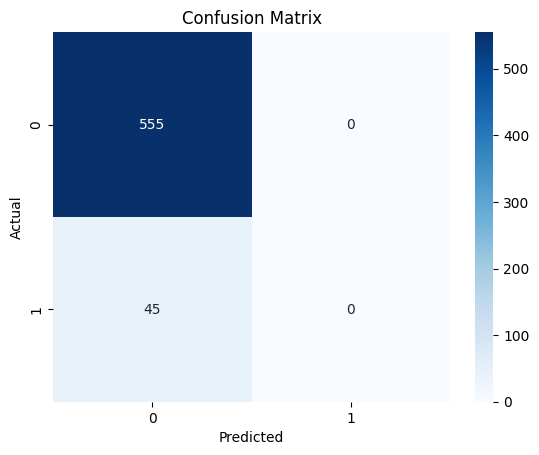

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

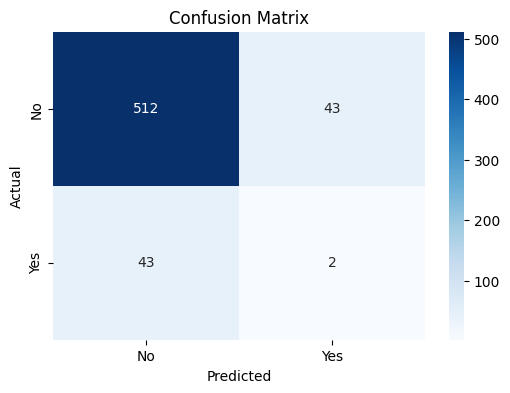

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = tree_model.predict(X_test)  # or log_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/tmp/ipython-input-3779724667.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in feat_imp], y=[x[0] for x in feat_imp], palette='viridis')


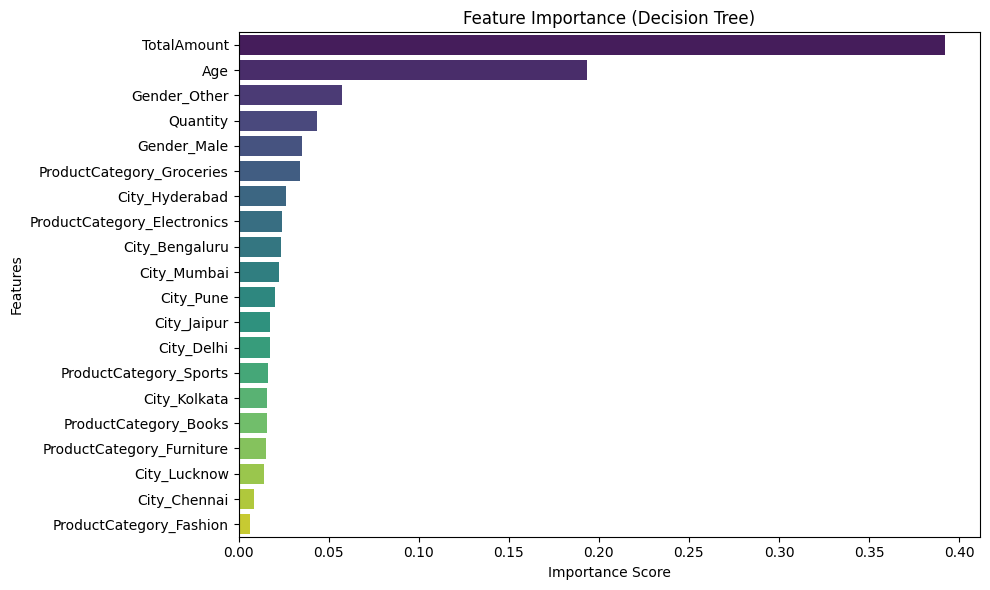

In [45]:
# Get feature importances
importances = tree_model.feature_importances_

# Get feature names
feature_names = X_train.columns  # Works if you're using pandas DataFrame

# Plot feature importance
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in feat_imp], y=[x[0] for x in feat_imp], palette='viridis')
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()